# Automatically Removed the Audio between 2 Dog Clicks

We can use matplotlib and numpy to load a wav file and graph it to see what the dog clicker looks like.

From https://stackoverflow.com/questions/18625085/how-to-plot-a-wav-file


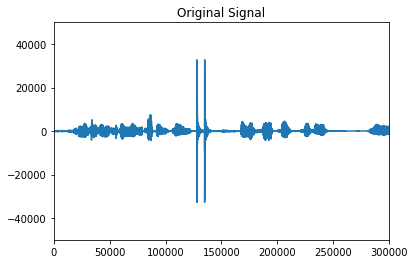

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

spf = wave.open("wavfile.wav", "r")
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")


plt.figure(1)
plt.xlim(0, 300000)
plt.title("Original Signal")
plt.ylim(-50000, 50000)
plt.plot(signal)
plt.show()


## Trimming the audio between clicks

Now we can look for exceptionally loud signals, back-up a bit and cut to the next exceptionally loud signal. Currently this is done heuristically.

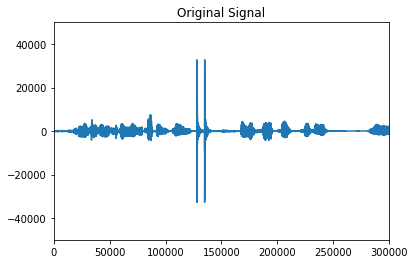

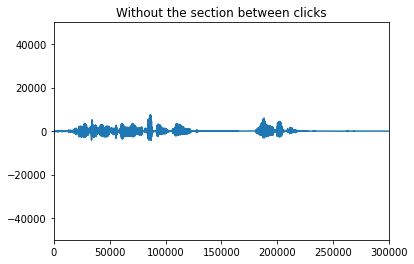

In [21]:
shelf = 25000
preClickEcho = 500
clickEcho = 10000

trimmedSignal = []
i = 0
while i < len(signal):
    s = signal[i]
    if (-1 * shelf) < s > shelf:
            trimmedSignal = trimmedSignal[0:i - preClickEcho]
            i += clickEcho
            while i < len(signal) and (-1 * shelf) < signal[i] < shelf:
                i += 1
            i += clickEcho
    else:
        trimmedSignal.append(s)
        i += 1


plt.figure(1)
plt.xlim(0, 300000)
plt.title("Original Signal")
plt.ylim(-50000, 50000)
plt.plot(signal)


plt.figure(2)
plt.title("Without the section between clicks")
plt.plot(trimmedSignal)
plt.xlim(0, 300000)
plt.ylim(-50000, 50000)

plt.show()




In [22]:
## Exporting the modified wav

Now we can write the file out using the parmaters from the original wav.

SyntaxError: invalid syntax (<ipython-input-22-915409bd8217>, line 3)

In [11]:
print("exporting to trimmed.wav")
outputFile = wave.open("trimmed.wav", "wb")
outputFile.setnchannels(spf.getnchannels())
outputFile.setframerate(spf.getframerate())
outputFile.setsampwidth(spf.getsampwidth())

#print(type(trimmedSignal))
outputFile.writeframes(np.array(trimmedSignal).tobytes())
outputFile.close()
print("done")

exporting
done
